In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import os

In [3]:
## Defining constants

DATASET = "./dataset"

TRAIN_DIR = DATASET + "/train"
TEST_DIR = DATASET + "/test"

TRAIN_IMAGES = os.listdir(TRAIN_DIR + '/images')
TRAIN_IMAGES.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
TRAIN_ANNOTATIONS = os.listdir(TRAIN_DIR + '/labels')
TRAIN_ANNOTATIONS.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

TEST_IMAGES = os.listdir(TEST_DIR + '/images')
TEST_ANNOTATIONS = os.listdir(TEST_DIR + '/labels')



In [4]:
assert len(TRAIN_IMAGES) == len(TRAIN_ANNOTATIONS), "Train images and annotations are not of same length"
assert len(TEST_IMAGES) == len(TEST_ANNOTATIONS), "Test images and annotations are not of same length"

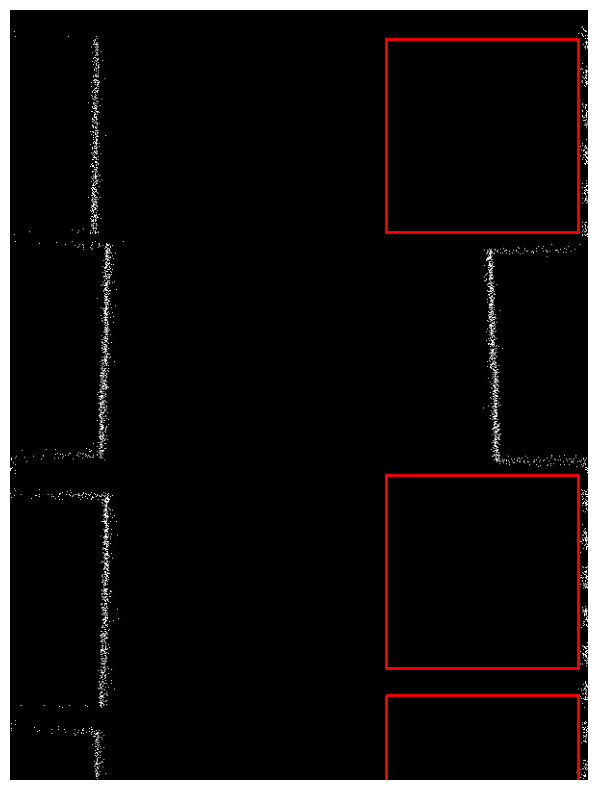

In [5]:
def visualize(image_path, bbox_df, figsize=(10, 10)):
    """
    Visualize the image along with the bounding boxes.
    
    Parameters:
    - image_path (str): The path to the image file.
    - bbox_df (pd.DataFrame): DataFrame containing bounding box coordinates [x_min, y_min, x_max, y_max].
    - figsize (tuple): The size of the figure for the plot.
    """
    # Load the image
    img = plt.imread(image_path)
    
    # Create a figure and axis to display the image
    fig, ax = plt.subplots(figsize=figsize)
    
    # Display the image
    ax.imshow(img)
    
    # Get the image dimensions
    height, width, _ = img.shape
    
    # Draw bounding boxes
    for row in bbox_df.itertuples(index=False):
        # Extract bounding box coordinates
        x_min, y_min, x_max, y_max = row
        
        # Create a rectangle patch for the bounding box
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='r', facecolor='none')
        
        # Add the bounding box to the plot
        ax.add_patch(rect)
    
    # Turn off axis labels for a cleaner look
    ax.axis('off')
    
    # Display the final image with bounding boxes
    plt.show()

# Example usage
# Assuming `TRAIN_IMAGES` and `TRAIN_ANNOTATIONS` have the file paths, and `TRAIN_DIR` is the base directory
image_path = TRAIN_DIR + '/images/' + TRAIN_IMAGES[0]
bbox_df = pd.read_csv(TRAIN_DIR + '/labels/' + TRAIN_ANNOTATIONS[0], delimiter=" ", header=None)

# Visualize the first image and its bounding boxes
visualize(image_path, bbox_df)


In [12]:
for ann in TRAIN_ANNOTATIONS:
    file_path = os.path.join(TRAIN_DIR, 'labels', ann)  # Construct the full file path

    # Check if the file exists and is not empty
    if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
        bbox_df = pd.read_csv(file_path, delimiter=" ", header=None)
        # Process bbox_df as needed

    else:
        print(f"Empty File: {file_path}")


Empty File: ./dataset/train\labels\IMG_31.txt
